In [37]:
import pandas as pd

sun_power = pd.read_excel('과제2_샘플데이터_태양광.xlsx', skiprows=5)
climate = pd.read_excel('./과제2_샘플데이터_기상Data.xlsx', sheet_name='1분 단위 Data')
climate['일시'] = pd.to_datetime(climate['일시'], format=' %m-%d  %H:%M:%S')
climate.set_index('일시', inplace=True)
sun_power.head(3)

,Unnamed: 0,Unnamed: 1,일사량,외기온도,모듈온도,총 전력(AC),DC전압,DC전류,DC전력,R상 전압,...,전압.24,전류.24,전압.25,전류.25,전압.26,전류.26,전압.27,전류.27,전압.28,전류.28
0,NaN,NaN,[W/m2],[℃],[℃],[kW],[V],[A],[kW],[V],...,[V],[A],[V],[A],[V],[A],[V],[A],[V],[A]
1,NaN,03-01 00:00:00,0,0.6,0.579175,0,5.24146,0,0,336.201,...,0,0,0,0,6.38384,0,6.36051,0,6.32388,0
2,NaN,03-01 00:15:00,0,0.6,0.5,0,5.71443,0,0,336.201,...,0,0,0,0,7.04444,0,7.03921,0,6.96225,0


In [38]:
climate.head(3)

,지점,기온(°C),누적강수량(mm),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%),일사(MJ/m^2),일조(Sec)
일시,,,,,,,,,,
1900-03-01 00:01:00,129,3.0,0.0,345.3,3.2,1001.4,1005.0,95.6,0.0,0
1900-03-01 00:02:00,129,3.0,0.0,334.2,3.8,1001.4,1005.0,95.7,0.0,0
1900-03-01 00:03:00,129,3.0,0.0,329.3,4.6,1001.3,1004.9,95.8,0.0,0


In [39]:
sun_df = sun_power.drop(sun_power.columns[:1], axis=1)
climate = climate.drop(climate.columns[:1], axis=1)
sun_df.head(3)

,Unnamed: 1,일사량,외기온도,모듈온도,총 전력(AC),DC전압,DC전류,DC전력,R상 전압,S상 전압,...,전압.24,전류.24,전압.25,전류.25,전압.26,전류.26,전압.27,전류.27,전압.28,전류.28
0,NaN,[W/m2],[℃],[℃],[kW],[V],[A],[kW],[V],[V],...,[V],[A],[V],[A],[V],[A],[V],[A],[V],[A]
1,03-01 00:00:00,0,0.6,0.579175,0,5.24146,0,0,336.201,333.922,...,0,0,0,0,6.38384,0,6.36051,0,6.32388,0
2,03-01 00:15:00,0,0.6,0.5,0,5.71443,0,0,336.201,332.229,...,0,0,0,0,7.04444,0,7.03921,0,6.96225,0


In [41]:
climate.head(3)

,기온(°C),누적강수량(mm),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%),일사(MJ/m^2),일조(Sec)
일시,,,,,,,,,
1900-03-01 00:01:00,3.0,0.0,345.3,3.2,1001.4,1005.0,95.6,0.0,0
1900-03-01 00:02:00,3.0,0.0,334.2,3.8,1001.4,1005.0,95.7,0.0,0
1900-03-01 00:03:00,3.0,0.0,329.3,4.6,1001.3,1004.9,95.8,0.0,0


In [42]:
import platform
from matplotlib import font_manager, rc

# 그래프에서 폰트 깨지는 문제에 대한 대처
plt.rcParams['axes.unicode_minus']=False

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')

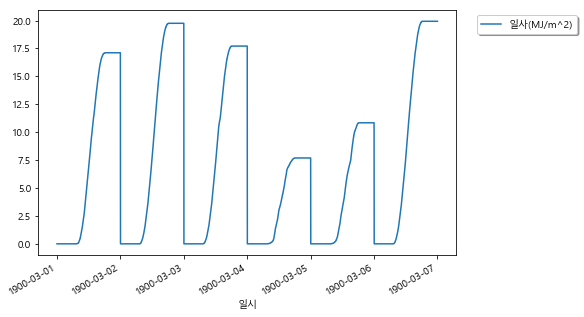

In [46]:
import matplotlib.pyplot as plt
climate.iloc[:, 7].plot(figsize=(7.5,5))
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1),
           ncol=1, fancybox=True, shadow=True)

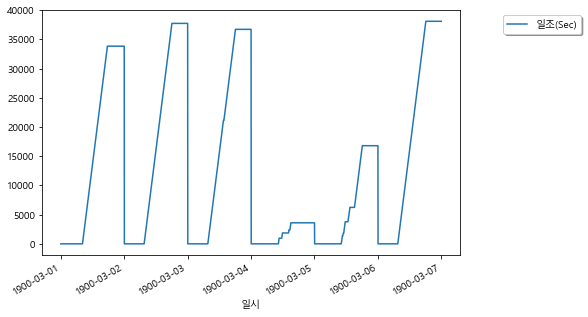

In [47]:
import matplotlib.pyplot as plt
climate.iloc[:, 8].plot(figsize=(7.5,5))
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1),
           ncol=1, fancybox=True, shadow=True)

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
climate.columns

Index(['기온(°C)', '누적강수량(mm)', '풍향(deg)', '풍속(m/s)', '현지기압(hPa)', '해면기압(hPa)',
       '습도(%)', '일사(MJ/m^2)', '일조(Sec)'],
      dtype='object')

In [59]:
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()

sun_1 = climate[['일사(MJ/m^2)']]
scaler1.fit(sun_1)
sun_1 = pd.DataFrame(scaler1.transform(sun_1), index=sun_1.index, columns=sun_1.columns)

sun_2 = climate[['일조(Sec)']]
scaler2.fit(sun_2)
sun_2 = pd.DataFrame(scaler2.transform(sun_2), index=sun_2.index, columns=sun_2.columns)

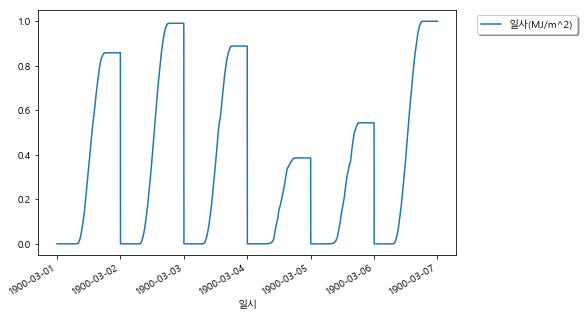

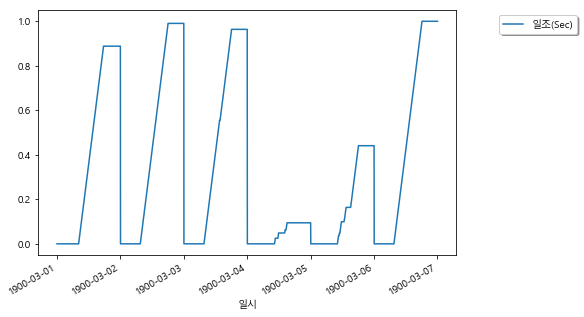

In [60]:
import matplotlib.pyplot as plt
sun_1.iloc[:, :].plot(figsize=(7.5,5))
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1),
           ncol=1, fancybox=True, shadow=True)

import matplotlib.pyplot as plt
sun_2.iloc[:, :].plot(figsize=(7.5,5))
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1),
           ncol=1, fancybox=True, shadow=True)

In [61]:
sun_1['일조(Sec)'] = sun_2
sun_1.head(3)

,일사(MJ/m^2),일조(Sec)
일시,,
1900-03-01 00:01:00,0.0,0.0
1900-03-01 00:02:00,0.0,0.0
1900-03-01 00:03:00,0.0,0.0


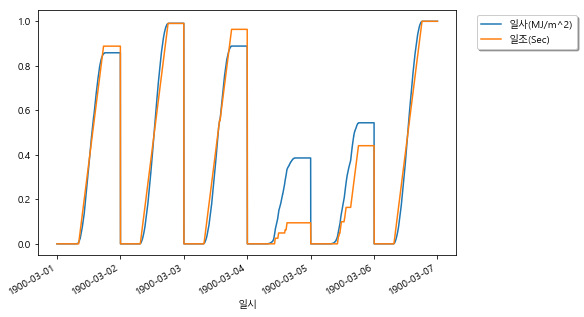

In [62]:
import matplotlib.pyplot as plt
sun_1.iloc[:, :].plot(figsize=(7.5,5))
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1),
           ncol=1, fancybox=True, shadow=True)

In [63]:
climate.tail(3)

,기온(°C),누적강수량(mm),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%),일사(MJ/m^2),일조(Sec)
일시,,,,,,,,,
1900-03-06 23:57:00,1.2,0.0,48.4,2.3,1027.0,1030.7,68.2,19.93,38100
1900-03-06 23:58:00,1.2,0.0,43.3,1.8,1027.0,1030.7,68.4,19.93,38100
1900-03-06 23:59:00,1.2,0.0,41.4,2.1,1027.0,1030.7,68.4,19.93,38100


In [32]:
sun_df = sun_df.drop(sun_df.index[0])
sun_df = sun_df.reset_index(drop=True)
sun_df.rename(columns={sun_df.columns[0]:"일시"}, inplace = True)

In [67]:
sun_df.head()

,Unnamed: 1,일사량,외기온도,모듈온도,총 전력(AC),DC전압,DC전류,DC전력,R상 전압,S상 전압,...,전압.24,전류.24,전압.25,전류.25,전압.26,전류.26,전압.27,전류.27,전압.28,전류.28
0,NaN,[W/m2],[℃],[℃],[kW],[V],[A],[kW],[V],[V],...,[V],[A],[V],[A],[V],[A],[V],[A],[V],[A]
1,03-01 00:00:00,0,0.6,0.579175,0,5.24146,0,0,336.201,333.922,...,0,0,0,0,6.38384,0,6.36051,0,6.32388,0
2,03-01 00:15:00,0,0.6,0.5,0,5.71443,0,0,336.201,332.229,...,0,0,0,0,7.04444,0,7.03921,0,6.96225,0
3,03-01 00:30:00,0,0.6,0.589008,0,6.48931,0,0,335.034,332.013,...,0,0,0,0,7.77166,0,7.79643,0,7.72711,0
4,03-01 00:45:00,0,0.519407,0.471353,0,5.78241,0,0,336.201,334.39,...,0,0,0,0,7.25147,0,7.23598,0,7.11249,0
5,03-01 01:00:00,0,0.322703,0.3,0,5.28564,0,0,336.201,334.3,...,0,0,0,0,6.49921,0,6.51747,0,6.50325,0
6,03-01 01:15:00,0,0.3,0.2,0,7.13852,0,0,336.201,334.786,...,0,0,0,0,8.40005,0,8.39232,0,8.17036,0
7,03-01 01:30:00,0,0.383473,0.225876,0,6.08708,0,0,336.201,334.821,...,0,0,0,0,7.09719,0,7.0871,0,7.02435,0
8,03-01 01:45:00,0,0.569199,0.431608,0,5.33262,0,0,336.201,334.946,...,0,0,0,0,6.36131,0,6.31844,0,6.35708,0
9,03-01 02:00:00,0,0.771377,0.596588,0,4.5451,0,0,336.201,335.083,...,0,0,0,0,5.34511,0,5.30409,0,5.40876,0


In [20]:
# dt_index = pd.date_range(start='20180301', end='20180306234500', freq= '15min')
# print(dt_index)
# print(len(dt_index))

In [21]:
# sun_df[sun_df.columns[0]] = dt_index
# sun_df.head(3)

In [22]:
# dt_index = pd.date_range(start='20180301', end='20180306235900', freq= '1min')
# print(dt_index)
# print(len(dt_index))

In [23]:
# len(climate)

- ???? 8640, 8636 길이 다름, 기상데이터 파일에 4개 누락된것 어쩔수 없음.

In [24]:
df = pd.merge(sun_df, climate, how='inner')
df.head()

,일시,일사량,외기온도,모듈온도,총 전력(AC),DC전압,DC전류,DC전력,R상 전압,S상 전압,...,전류.28,기온(°C),누적강수량(mm),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%),일사(MJ/m^2),일조(Sec)
0,03-01 00:15:00,0,0.6,0.5,0,5.71443,0,0,336.201,332.229,...,0,2.6,0.0,350.6,2.6,1001.6,1005.2,96.5,0.0,0
1,03-01 00:30:00,0,0.6,0.589008,0,6.48931,0,0,335.034,332.013,...,0,2.8,0.0,34.8,0.5,1001.7,1005.3,96.7,0.0,0
2,03-01 00:45:00,0,0.519407,0.471353,0,5.78241,0,0,336.201,334.39,...,0,2.7,0.0,274.1,0.8,1002.1,1005.7,97.1,0.0,0
3,03-01 01:00:00,0,0.322703,0.3,0,5.28564,0,0,336.201,334.3,...,0,2.8,0.0,317.6,1.0,1001.9,1005.5,96.8,0.0,0
4,03-01 01:15:00,0,0.3,0.2,0,7.13852,0,0,336.201,334.786,...,0,2.9,0.0,351.6,2.4,1002.1,1005.7,96.1,0.0,0


In [25]:
len(sun_df)

576

In [26]:
len(df)

574

### 기상자료 합친 걸로 해보기
- 발전량 데이터로 할시 skip

In [159]:
sun_df = df.copy()

- 발전량 으로 할시 위에 라인 주석 처리 후 실행

- 기상데이터 파일 자체 길이가 다름

In [161]:
sun_df=sun_df.set_index('일시') #, drop=False
sun_df.head()

,일사량,외기온도,모듈온도,총 전력(AC),DC전압,DC전류,DC전력,R상 전압,S상 전압,T상 전압,...,전류.28,기온(°C),누적강수량(mm),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%),일사(MJ/m^2),일조(Sec)
일시,,,,,,,,,,,,,,,,,,,,,
03-01 00:15:00,0,0.6,0.5,0,5.71443,0,0,336.201,332.229,333.885,...,0,2.6,0.0,350.6,2.6,1001.6,1005.2,96.5,0.0,0
03-01 00:30:00,0,0.6,0.589008,0,6.48931,0,0,335.034,332.013,333.713,...,0,2.8,0.0,34.8,0.5,1001.7,1005.3,96.7,0.0,0
03-01 00:45:00,0,0.519407,0.471353,0,5.78241,0,0,336.201,334.39,332.047,...,0,2.7,0.0,274.1,0.8,1002.1,1005.7,97.1,0.0,0
03-01 01:00:00,0,0.322703,0.3,0,5.28564,0,0,336.201,334.3,332.189,...,0,2.8,0.0,317.6,1.0,1001.9,1005.5,96.8,0.0,0
03-01 01:15:00,0,0.3,0.2,0,7.13852,0,0,336.201,334.786,332.49,...,0,2.9,0.0,351.6,2.4,1002.1,1005.7,96.1,0.0,0


In [162]:
sun_df = sun_df[sun_df[sun_df.columns[1]] != 0]
sun_df.head()

,일사량,외기온도,모듈온도,총 전력(AC),DC전압,DC전류,DC전력,R상 전압,S상 전압,T상 전압,...,전류.28,기온(°C),누적강수량(mm),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%),일사(MJ/m^2),일조(Sec)
일시,,,,,,,,,,,,,,,,,,,,,
03-01 00:15:00,0,0.6,0.5,0,5.71443,0,0,336.201,332.229,333.885,...,0,2.6,0.0,350.6,2.6,1001.6,1005.2,96.5,0.0,0
03-01 00:30:00,0,0.6,0.589008,0,6.48931,0,0,335.034,332.013,333.713,...,0,2.8,0.0,34.8,0.5,1001.7,1005.3,96.7,0.0,0
03-01 00:45:00,0,0.519407,0.471353,0,5.78241,0,0,336.201,334.39,332.047,...,0,2.7,0.0,274.1,0.8,1002.1,1005.7,97.1,0.0,0
03-01 01:00:00,0,0.322703,0.3,0,5.28564,0,0,336.201,334.3,332.189,...,0,2.8,0.0,317.6,1.0,1001.9,1005.5,96.8,0.0,0
03-01 01:15:00,0,0.3,0.2,0,7.13852,0,0,336.201,334.786,332.49,...,0,2.9,0.0,351.6,2.4,1002.1,1005.7,96.1,0.0,0


In [163]:
sun_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 573 entries,  03-01  00:15:00 to  03-06  23:45:00
Data columns (total 91 columns):
일사량           573 non-null object
외기온도          573 non-null object
모듈온도          573 non-null object
총 전력(AC)      573 non-null object
DC전압          573 non-null object
DC전류          573 non-null object
DC전력          573 non-null object
R상 전압         573 non-null object
S상 전압         573 non-null object
T상 전압         573 non-null object
R상 전류         573 non-null object
S상 전류         573 non-null object
T상 전류         573 non-null object
AC전력          573 non-null object
전압            573 non-null object
전류            573 non-null object
전압.1          573 non-null object
전류.1          573 non-null object
전압.2          573 non-null object
전류.2          573 non-null object
전압.3          573 non-null object
전류.3          573 non-null object
전압.4          573 non-null object
전류.4          573 non-null object
전압.5          573 non-null object
전류.5          573 non-

In [164]:
sun_df.convert_objects(convert_numeric=True).dtypes

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


일사량           float64
외기온도          float64
모듈온도          float64
총 전력(AC)      float64
DC전압          float64
DC전류          float64
DC전력          float64
R상 전압         float64
S상 전압         float64
T상 전압         float64
R상 전류         float64
S상 전류         float64
T상 전류         float64
AC전력          float64
전압            float64
전류            float64
전압.1          float64
전류.1          float64
전압.2          float64
전류.2          float64
전압.3          float64
전류.3          float64
전압.4          float64
전류.4            int64
전압.5          float64
전류.5            int64
전압.6          float64
전류.6          float64
전압.7          float64
전류.7          float64
               ...   
전류.18         float64
전압.19         float64
전류.19         float64
전압.20         float64
전류.20         float64
전압.21         float64
전류.21         float64
전압.22         float64
전류.22         float64
전압.23         float64
전류.23         float64
전압.24         float64
전류.24         float64
전압.25         float64
전류.25     

In [165]:
sun_df.fillna(0, inplace=True)

In [166]:
sun_df.columns

Index(['일사량', '외기온도', '모듈온도', '총 전력(AC)', 'DC전압', 'DC전류', 'DC전력', 'R상 전압',
       'S상 전압', 'T상 전압', 'R상 전류', 'S상 전류', 'T상 전류', 'AC전력', '전압', '전류', '전압.1',
       '전류.1', '전압.2', '전류.2', '전압.3', '전류.3', '전압.4', '전류.4', '전압.5', '전류.5',
       '전압.6', '전류.6', '전압.7', '전류.7', '전압.8', '전류.8', '전압.9', '전류.9', '전압.10',
       '전류.10', '전압.11', '전류.11', '전압.12', '전류.12', '전압.13', '전류.13', '전압.14',
       '전류.14', '전압.15', '전류.15', 'DC전압.1', 'DC전류.1', 'DC전력.1', 'R상 전압.1',
       'S상 전압.1', 'T상 전압.1', 'R상 전류.1', 'S상 전류.1', 'T상 전류.1', 'AC전력.1',
       '전압.16', '전류.16', '전압.17', '전류.17', '전압.18', '전류.18', '전압.19', '전류.19',
       '전압.20', '전류.20', '전압.21', '전류.21', '전압.22', '전류.22', '전압.23', '전류.23',
       '전압.24', '전류.24', '전압.25', '전류.25', '전압.26', '전류.26', '전압.27', '전류.27',
       '전압.28', '전류.28', '기온(°C)', '누적강수량(mm)', '풍향(deg)', '풍속(m/s)',
       '현지기압(hPa)', '해면기압(hPa)', '습도(%)', '일사(MJ/m^2)', '일조(Sec)'],
      dtype='object')

In [167]:
col_list = []
for i in sun_df.columns:
    if i not in ['총 전력(AC)', '일사량']:
        col_list.append(i)

In [168]:
X_train = sun_df[col_list]
y_train = sun_df[['총 전력(AC)']]

### EDA

In [169]:
import platform
from matplotlib import font_manager, rc

# 그래프에서 폰트 깨지는 문제에 대한 대처
plt.rcParams['axes.unicode_minus']=False

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')

In [170]:
from matplotlib import pyplot as plt
%matplotlib inline

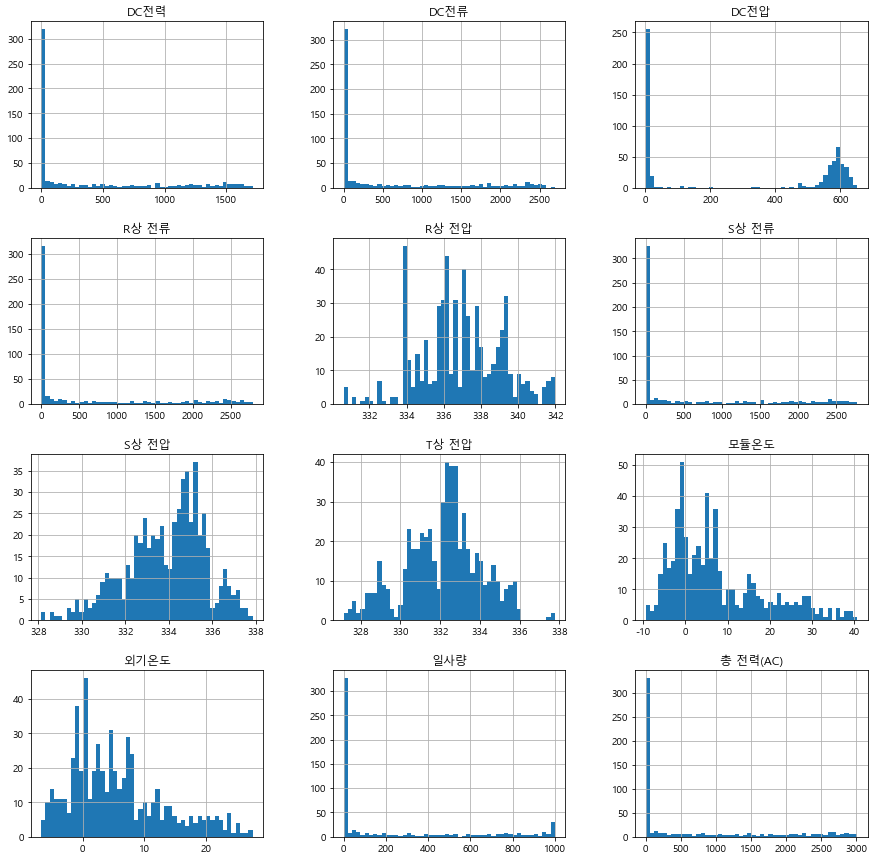

In [171]:
sun_df[sun_df.columns[:12]].hist(bins=50, figsize=(15, 15))

plt.show() # 수치형은 hist가 제일 보기 좋다.

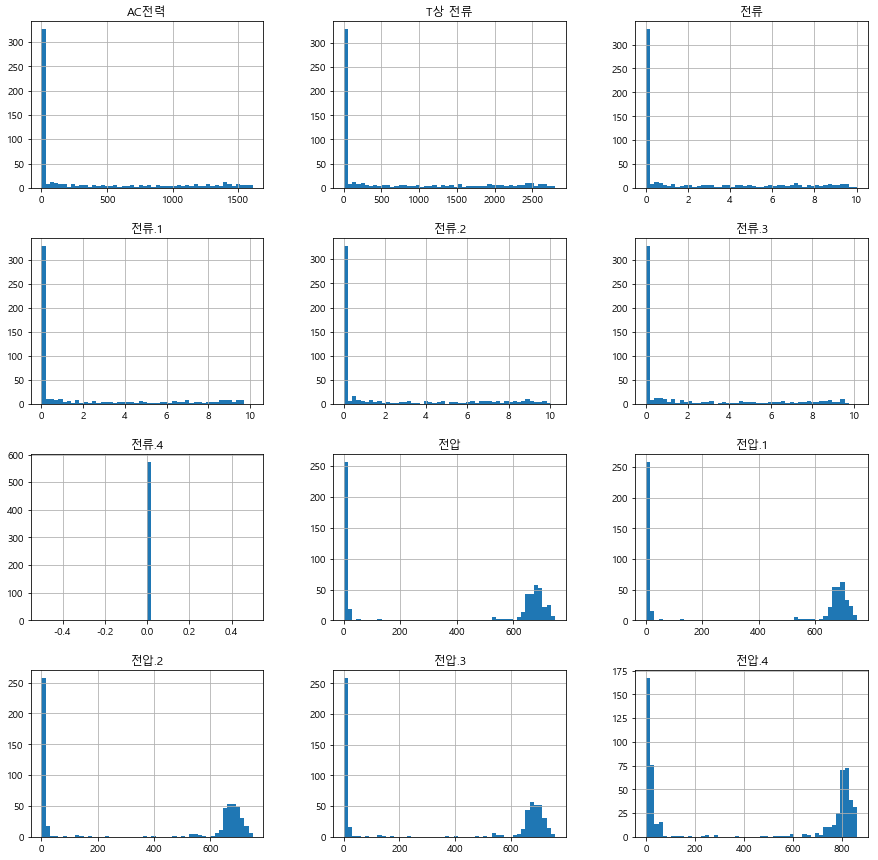

In [172]:
sun_df[sun_df.columns[12:24]].hist(bins=50, figsize=(15, 15))

plt.show() # 수치형은 hist가 제일 보기 좋다.

### 발전량 모듈 컬럼 합치기

In [173]:
sun_df.columns

Index(['일사량', '외기온도', '모듈온도', '총 전력(AC)', 'DC전압', 'DC전류', 'DC전력', 'R상 전압',
       'S상 전압', 'T상 전압', 'R상 전류', 'S상 전류', 'T상 전류', 'AC전력', '전압', '전류', '전압.1',
       '전류.1', '전압.2', '전류.2', '전압.3', '전류.3', '전압.4', '전류.4', '전압.5', '전류.5',
       '전압.6', '전류.6', '전압.7', '전류.7', '전압.8', '전류.8', '전압.9', '전류.9', '전압.10',
       '전류.10', '전압.11', '전류.11', '전압.12', '전류.12', '전압.13', '전류.13', '전압.14',
       '전류.14', '전압.15', '전류.15', 'DC전압.1', 'DC전류.1', 'DC전력.1', 'R상 전압.1',
       'S상 전압.1', 'T상 전압.1', 'R상 전류.1', 'S상 전류.1', 'T상 전류.1', 'AC전력.1',
       '전압.16', '전류.16', '전압.17', '전류.17', '전압.18', '전류.18', '전압.19', '전류.19',
       '전압.20', '전류.20', '전압.21', '전류.21', '전압.22', '전류.22', '전압.23', '전류.23',
       '전압.24', '전류.24', '전압.25', '전류.25', '전압.26', '전류.26', '전압.27', '전류.27',
       '전압.28', '전류.28', '기온(°C)', '누적강수량(mm)', '풍향(deg)', '풍속(m/s)',
       '현지기압(hPa)', '해면기압(hPa)', '습도(%)', '일사(MJ/m^2)', '일조(Sec)'],
      dtype='object')

In [174]:
import re

col_volt = []
col_elec = []
for col in sun_df.columns:
    if re.findall('^전압 ?', col):
        col_volt.append(col)
        
    if re.findall('^전류 ?', col):
        col_elec.append(col)
    
print(col_volt)
print(col_elec)

['전압', '전압.1', '전압.2', '전압.3', '전압.4', '전압.5', '전압.6', '전압.7', '전압.8', '전압.9', '전압.10', '전압.11', '전압.12', '전압.13', '전압.14', '전압.15', '전압.16', '전압.17', '전압.18', '전압.19', '전압.20', '전압.21', '전압.22', '전압.23', '전압.24', '전압.25', '전압.26', '전압.27', '전압.28']
['전류', '전류.1', '전류.2', '전류.3', '전류.4', '전류.5', '전류.6', '전류.7', '전류.8', '전류.9', '전류.10', '전류.11', '전류.12', '전류.13', '전류.14', '전류.15', '전류.16', '전류.17', '전류.18', '전류.19', '전류.20', '전류.21', '전류.22', '전류.23', '전류.24', '전류.25', '전류.26', '전류.27', '전류.28']


In [175]:
sun_df['인버터1_총전압'] = sun_df.loc[:, col_volt[:16]].sum(axis=1)
sun_df['인버터1_총전류'] = sun_df.loc[:, col_elec[:16]].sum(axis=1)
sun_df['인버터2_총전압'] = sun_df.loc[:, col_volt[16:]].sum(axis=1)
sun_df['인버터2_총전류'] = sun_df.loc[:, col_elec[16:]].sum(axis=1)

In [176]:
sun_df_2 = sun_df.drop(col_volt+col_elec, axis=1)

In [177]:
len(sun_df_2.columns)

37

In [178]:
col_list = []
for i in sun_df_2.columns:
    if i not in ['총 전력(AC)', '일사량']:
        col_list.append(i)

In [179]:
X_train = sun_df_2[col_list]
y_train = sun_df_2[['총 전력(AC)']]

In [180]:
X_train.columns

Index(['외기온도', '모듈온도', 'DC전압', 'DC전류', 'DC전력', 'R상 전압', 'S상 전압', 'T상 전압',
       'R상 전류', 'S상 전류', 'T상 전류', 'AC전력', 'DC전압.1', 'DC전류.1', 'DC전력.1',
       'R상 전압.1', 'S상 전압.1', 'T상 전압.1', 'R상 전류.1', 'S상 전류.1', 'T상 전류.1',
       'AC전력.1', '기온(°C)', '누적강수량(mm)', '풍향(deg)', '풍속(m/s)', '현지기압(hPa)',
       '해면기압(hPa)', '습도(%)', '일사(MJ/m^2)', '일조(Sec)', '인버터1_총전압', '인버터1_총전류',
       '인버터2_총전압', '인버터2_총전류'],
      dtype='object')

In [181]:
y_train.columns

Index(['총 전력(AC)'], dtype='object')

### 시계열 데이터는 랜덤으로 자르면 안된다.

In [182]:
from sklearn.model_selection import train_test_split

X_train, x_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.3, shuffle=False)

In [183]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler2 = MinMaxScaler()

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(x_test)

y_train_s = scaler2.fit_transform(y_train)
y_test_s = scaler2.transform(y_test)

In [184]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rfModel = RandomForestRegressor(n_estimators=20)
rfModel.fit(X_train_s, y_train_s)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

-  발전량 데이터만 사용했을 시 0.006209755641099675

In [185]:
import numpy as np

preds = rfModel.predict(X_test_s)
error = np.sqrt(mean_squared_error(y_test_s, preds))
print(error)

0.007308395177286555


- 발전량데이터 + 기상청 데이터가 더 점수가 좋지 않다.

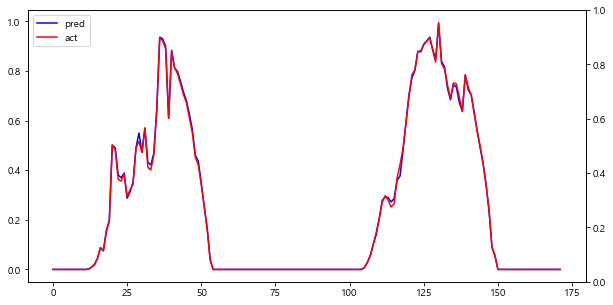

In [186]:
fig, loss_ax = plt.subplots(figsize=(10,5))
acc_ax = loss_ax.twinx()

pred = preds
loss_ax.plot(pred, 'b', label='pred')
loss_ax.plot(y_test_s, 'r', label='act')
loss_ax.legend(loc='upper left')

plt.show()

### 전압, 전류 전체 컬럼 사용 해보기

In [ ]:
col_list = []
for i in sun_df.columns:
    if i not in ['총 전력(AC)', '일사량']:
        col_list.append(i)

In [ ]:
X_train = sun_df[col_list]
y_train = sun_df[['총 전력(AC)']]

### 시계열 데이터는 랜덤으로 자르면 안된다.

In [22]:
from sklearn.model_selection import train_test_split

X_train, x_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.3, shuffle=False)

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler2 = MinMaxScaler()

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(x_test)

y_train_s = scaler2.fit_transform(y_train)
y_test_s = scaler2.transform(y_test)

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rfModel = RandomForestRegressor(n_estimators=20)
rfModel.fit(X_train_s, y_train_s)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [27]:
import numpy as np

preds = rfModel.predict(X_test_s)
error = np.sqrt(mean_squared_error(y_test_s, preds))
print(error)

0.008740127214617125


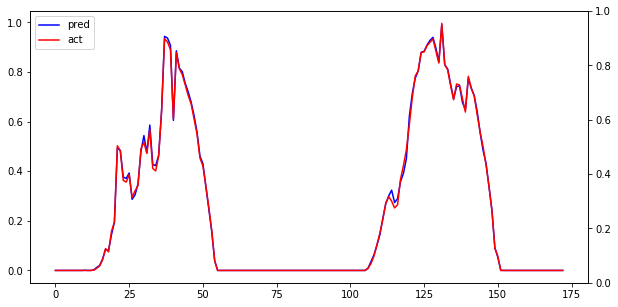

In [28]:
fig, loss_ax = plt.subplots(figsize=(10,5))
acc_ax = loss_ax.twinx()

pred = preds
loss_ax.plot(pred, 'b', label='pred')
loss_ax.plot(y_test_s, 'r', label='act')
loss_ax.legend(loc='upper left')

plt.show()

(<matplotlib.axes._subplots.AxesSubplot at 0x2644f3347f0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2645036cf98>)

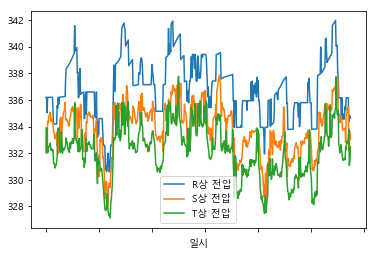

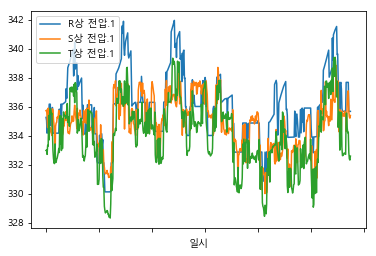

In [111]:
sun_df[sun_df.columns[7:10]].plot(), sun_df[sun_df.columns[49:52]].plot()

(<matplotlib.axes._subplots.AxesSubplot at 0x264503d09b0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x26450498898>)

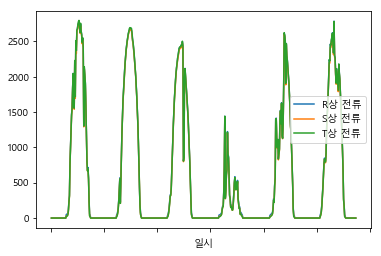

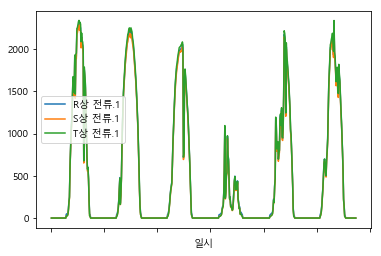

In [113]:
sun_df[sun_df.columns[10:13]].plot(), sun_df[sun_df.columns[52:55]].plot()

(<matplotlib.axes._subplots.AxesSubplot at 0x264504e1710>,
 <matplotlib.axes._subplots.AxesSubplot at 0x264504e1710>)

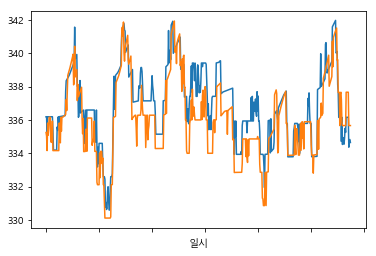

In [114]:
sun_df[sun_df.columns[7]].plot(), sun_df[sun_df.columns[49]].plot()

(<matplotlib.axes._subplots.AxesSubplot at 0x26450577160>,
 <matplotlib.axes._subplots.AxesSubplot at 0x26450577160>)

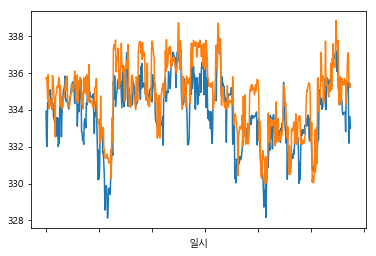

In [115]:
sun_df[sun_df.columns[8]].plot(), sun_df[sun_df.columns[50]].plot()

(<matplotlib.axes._subplots.AxesSubplot at 0x264503f5b70>,
 <matplotlib.axes._subplots.AxesSubplot at 0x264503f5b70>)

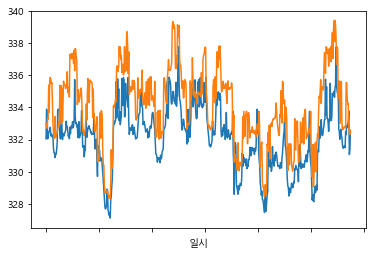

In [116]:
sun_df[sun_df.columns[9]].plot(), sun_df[sun_df.columns[51]].plot()